In [2]:
# Importación de bibliotecas
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns

# Tarea 7 - Distribuciones de Probabilidad Discretas

> Asignatura: Simulación<br/>
> Estudiante: Eduardo Zhizhpon

## A. Introducción

Las distribuciones discretas de probabilidades son muy útiles cuando se emplean la representación de modelos estocásticos para procesos que requieran conteo. Esto puede realizarse para muestras finitas, donde la ocurrencia está dada por el azar.

A continuación, se realizará una descripción de técnicas para generar valores de variables aleatorias a partir de distribuciones discretas: hipergeométrica, uniforme y binomial negativa. Finalmente, se darán a conocer las funciones en Python necesarias para la generación de valores aleatorios y ejemplo orientado a la realidad.

## B. Descripción

### 1. Hipergeométrica

Se define como: dada una población finita de tamaño N, donde hay dos tipos de objetos denominados como éxitos y fracasos. La distribución hipergeométrica es utilizada para casos donde se extraigan muestras o se realicen experiencias repetidas sin devolución del elemento extraído. Por lo tanto, es útil para el cálculo de probabilidades de juegos de azar y en el estudio de muestras pequeñas.

Consideraciones a tener en cuenta dentro de la distribución hipergeométrica:

- El proceso consta de *n* pruebas, separadas o separables de entre un conjunto de *N* pruebas posibles.
- Cada una de las pruebas puede dar únicamente dos resultados mutuamente excluyentes.
- El número de individuos que presentan la característica A (éxito) es *M*.
- Limitantes de los valores:
    - *r* : $max(0, n - N + M)$ y $min(n, M)$ inclusivo
    - *n* : $1 \leq n \leq N$
    - *N* : $N \geq 1$
    - *M* : $M \geq 1$
- En la primera prueba las probabilidades son: $P(A) = p$ y $P(A) = q$; con $p + q = 1$.

Para ello, se define la variable aleatoria $r = \text{"n° de éxitos obtenidos"}$. Siendo la función de probabilidad:
$$p(r;n,N,M)=\frac{ \left(\begin{array}{c} M \\ r \end{array}\right) . \left(\begin{array}{c} N-M \\ n-r \end{array}\right) }{ \left(\begin{array}{c} N \\ n \end{array}\right) }
$$

Donde:

> $M$ = cantidad de éxitos posibles en la población <br/>
$N$ = tamaño de población <br/>
$n$ = tamaño de la muestra <br/>
$r$ = valor que toma la variable aleatoria

### 2. Uniforme

La distribución uniforme para valores discretos se encarga de asignar valores a una variable con la misma probabilidad de ocurrencia. Es decir, esta distribución asigna la misma probabilidad a todos los valores entre el límite inferior y superior.

Por lo tanto, la función para el comportamiento de una variable aleatoria discreta con distribución uniforme será:

$$
p(x;k) = \left\{
	\begin{array}{ll}
            0  & \mbox{si } x \neq x_{i} & i = 1, 2, ..., k\\
            \frac{1}{k} & \mbox{si } x = x_{i} & i = 1, 2, ..., k
	\end{array}
\right.
$$


### 3. Binomial Negativa

Se considera como una distribución que se extiende la distribución geométrica. Básicamente, se utiliza en procesos que se requieran N casos favorables (primer éxito). Es decir, modela el número de ensayos necesarios para que se produzcan un número específico de eventos.

**Condiciones:**

- Cada secuencia es independiente de otras.
- En cada intento solamente son posibles dos resultados (éxito o fracaso)
- La probabilidad de éxito es constante en cada secuencia
- Los intentos continúan hasta que se consigan r éxitos


Por lo tanto, la función para el comportamiento de una variable aleatoria discreta con distribución binomial negativa será:

$$
f(x)=\left(\begin{array}{c} x - 1 \\ r - 1 \end{array}\right) p^{r} (1 - p)^{x-r}
$$

Donde: 

> $x$ = número de ensayos hasta obtener el r-ésimo éxito} <br/>
$p$ = la probabilidad de pasar el control de calidad} <br/>
$r$ = la cantidad de éxitos

## C. Ejemplo del uso

### 1. Hipergeométrica

La distribución hipergeométrica se lo puede realizar en Python de la siguiente manera:

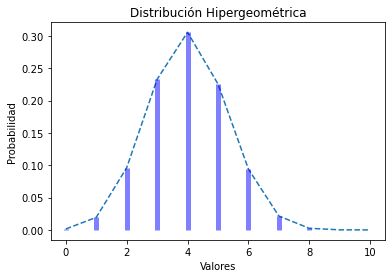

In [8]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.show()

Histograma:

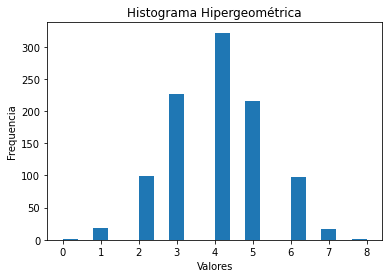

In [7]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma Hipergeométrica')
plt.show()

**Ejemplo de aplicación**

Como se mostró anteriormente, esta distribución puede ser usada en para calcular la probabilidad de juegos de azar. Por ejemplo, la extracción de 8 cartas de 40 totales, donde el objetivo es que salgan sólo "A". Al realizar la extracción, sin devolver las cartas seleccionadas, llamamos *r* a las cartas con la letra "A". Por lo tanto, *r* seguirá una distribución hipergeométrica con los siguientes parámetros y su respectiva resolución:

|Parámetros|Resolución|
|:----------:|:-------------:|
| **N** = 40 <br/>**M** = 10 <br/>**n** = 8 <br/>**r** = 4 <br/> | $$p(4;8,40,10)=\frac{ \left(\begin{array}{c} 10 \\ 4 \end{array}\right) . \left(\begin{array}{c} 30 \\ 4 \end{array}\right) }{ \left(\begin{array}{c} 40 \\ 8 \end{array}\right) } = 0,075 $$|

### 2. Uniforme

La distribución uniforme discreta se lo puede realizar en Python de la siguiente manera:

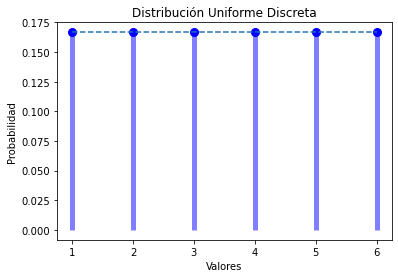

In [10]:
a = 1
b = 6
x = np.arange(a, b + 1)
uniforme_discreta = stats.randint(a, b + 1)

uniforme_discreta_pmf = uniforme_discreta.pmf(x)


plt.plot(x, uniforme_discreta_pmf, 'bo', ms=8)
plt.plot(x, uniforme_discreta_pmf, '--', ms=8)
plt.vlines(x, 0, uniforme_discreta_pmf, colors='b', lw=5, alpha=0.5)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Distribución Uniforme Discreta')
plt.show()

Histograma:

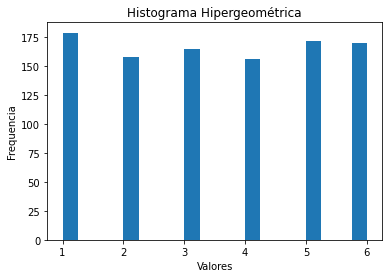

In [14]:
# histograma
aleatorios = uniforme_discreta.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma Hipergeométrica')
plt.show()

**Ejemplo de aplicación**

El temario para un examen consta de 35 temas, de los cuales se elegirá uno al azar. Si un alumno no ha estudiado los 10 últimos temas ¿Cuál es la probabilidad de que el alumno sepa el tema elegido para el examen?

Sea X la variable aleatoria que representa el número de tema seleccionado para el examen, como todos los temas tienen la misma probabilidad de ser seleccionado, X sigue una distribución uniforme discreta de 35 elementos.

Por la tanto, la representación de la fórmula quedaría de la siguiente manera:

$$
p(x;35) = \left\{
	\begin{array}{ll}
            0  & \mbox{si } x \neq x_{i} & i = 1, 2, ..., k\\
            \frac{1}{35} & \mbox{si } x = x_{i} & i = 1, 2, ..., k
	\end{array}
\right.
$$

### 3. Binomial Negativa

La distribución uniforme discreta se lo puede realizar en Python de la siguiente manera:

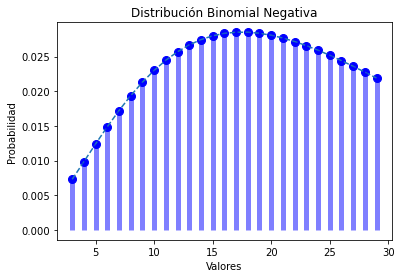

In [25]:
x = np.arange(3, 30)
r = 3
p = 0.1

binomial_negativa = stats.nbinom.pmf(x, r, p)

plt.plot(x, binomial_negativa, 'bo', ms=8)
plt.plot(x, binomial_negativa, '--', ms=8)
plt.vlines(x, 0, binomial_negativa, colors='b', lw=5, alpha=0.5)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Distribución Binomial Negativa')
plt.show()

Histograma:

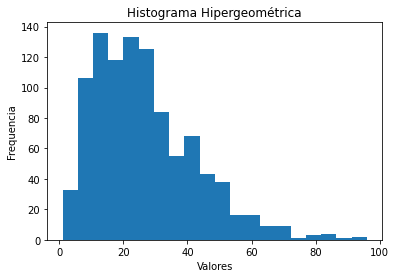

In [26]:
# histograma
aleatorios = stats.nbinom.rvs(r, p, size=1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma Hipergeométrica')
plt.show()

**Ejemplo de aplicación**

Se sabe que la probabilidad de que un niño expuesto a una enfermedad contagiosa la contraiga es de 0,4. Calcula la probabilidad de que el décimo niño estudiado sea el tercero en contraer la enfermedad.

Podemos enfocar el problema como una binomial negativa de parámetros X = 10, k=3 y p=0,4


$$
f(x)=\left(\begin{array}{c} 9 \\ 2 \end{array}\right) (0,4)^{3} (0,6)^{7} = 0,0645
$$

### D. Referencias

Bibliografía
Cañas, J. (2022). 4.4. Distribución binomial negativa. Proyecto Descartes. https://proyectodescartes.org/iCartesiLibri/materiales_didacticos/EstadisticaProbabilidadInferencia/VAdiscreta/4_4DistribucionBinomialNegativa.html

Distribución binomial negativa. (2022). Soporte de Minitab 8. https://support.minitab.com/es-mx/minitab/18/help-and-how-to/probability-distributions-and-random-data/supporting-topics/distributions/negative-binomial-distribution/

Lopez Briega, R. E. (2016). Distribuciones de probabilidad con Python. Raul E. Lopez Briega. https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

PyShark, M. (2022). Continuous and discrete uniform distribution in Python. PyShark. https://pyshark.com/continuous-and-discrete-uniform-distribution-in-python/